## Visulizations 
This notebook will call in data that we cleaned in our previous notebook. Then we will play with columns to make visuals and get a better understanding of our data. 

***
## Import neccessary packages and data:
- import packages needed
- call in pickle file 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_pickle("data/whole_data.pkl")

***
## Create Visuals 
Sort and aggergate by columns to organize data into two new data frames:  
1. based on genres   
2. based on season 

In [3]:
genres = df['genres'].map(str).values.tolist()
genres = ' '.join(genres)
genres = genres.split(' ')
genres = list(set(genres))

plot_df = df[['name', 'owners', 'price', 'est_revenue', 'season', 'genres']].copy()

for col in sorted(genres):
    plot_df[col] = plot_df['genres'].apply(lambda x: 1 if col in x.split(' ') else 0)
    
seasons = ['spring', 'summer', 'fall', 'winter']
for col in sorted(seasons):
    plot_df[col] = plot_df['season'].apply(lambda x: 1 if col in x else 0)
    
plot_df = plot_df.astype({'est_revenue': 'int64'})

In [4]:
plot_df.tail()

,name,owners,price,est_revenue,season,genres,,action,adventure,animation&modeling,...,sports,strategy,utilities,videoproduction,violent,webpublishing,fall,spring,summer,winter
19742,room of pandora,10000,2.09,20900,spring,adventure casual indie,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
19743,cyber gun,10000,1.69,16900,spring,action adventure indie,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
19744,super star blast,10000,3.99,39900,spring,action casual indie,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
19745,new yankee 7 deer hunters,10000,5.19,51900,spring,adventure casual indie,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
19746,rune lord,10000,5.19,51900,spring,adventure casual indie,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df_seasons = (plot_df.groupby(['season'],as_index=False).agg({'name':'count', 'est_revenue':'mean', 'action' : 'sum',
                'adventure' : 'sum','animation&modeling' : 'sum', 'audioproduction': 'sum', 'casual': 'sum', 
                'design&illustration': 'sum', 'education': 'sum', 'freetoplay': 'sum', 'gamedevelopment': 'sum', 
                'gore': 'sum', 'indie': 'sum',  'nudity': 'sum', 'racing': 'sum', 'rpg': 'sum', 
                'sexualcontent': 'sum', 'simulation': 'sum', 'softwaretraining': 'sum', 'sports': 'sum',
                'strategy': 'sum', 'utilities': 'sum','videoproduction': 'sum', 'violent': 'sum', 
                'webpublishing': 'sum'})
             .rename(columns={'name': 'num_games'}))

df_seasons

,season,num_games,est_revenue,action,adventure,animation&modeling,audioproduction,casual,design&illustration,education,...,rpg,sexualcontent,simulation,softwaretraining,sports,strategy,utilities,videoproduction,violent,webpublishing
0,fall,4758,2.012628e+06,2076,1789,14,4,1701,17,3,...,754,32,943,2,225,953,18,2,118,3
1,spring,4672,1.524867e+06,2118,1794,13,5,1730,14,12,...,733,50,902,8,213,917,26,5,150,5
2,summer,4213,1.244695e+06,1897,1579,11,4,1548,11,6,...,656,45,816,1,217,824,14,5,162,3
3,winter,4287,1.696994e+06,1890,1673,14,7,1634,13,7,...,755,28,828,3,197,825,22,4,139,5


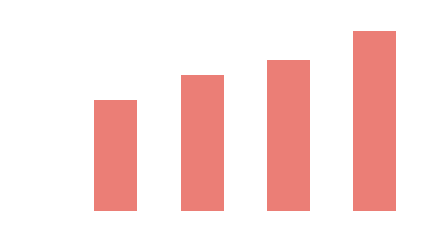

In [6]:
df_season = df_seasons.sort_values(by=['est_revenue'])
df_season.plot(kind='bar',x='season',y='est_revenue',color='#eb7e76', legend=False)
plt.ylabel('Est Revenue' , color='white') # , color='white'
plt.xlabel('Season' , color='white')
plt.title('Est Revenue for Each Season', color='white')
plt.tight_layout() 
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["left"].set_color("white")
ax.spines["bottom"].set_color("white")
ax.tick_params(axis='x', rotation=0, colors='white')
ax.tick_params(axis='y', colors='white')
plt.savefig('images/season_rev_count_white.png', dpi=1200, transparent=True) 
# plt.show

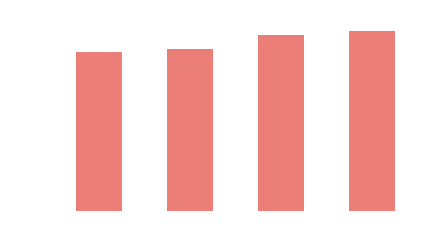

In [7]:
df_season = df_seasons.sort_values(by=['num_games'])
df_season.plot(kind='bar',x='season',y='num_games',color='#eb7e76', legend=False)
plt.ylabel('Number of Games' , color='white') # , color='white'
plt.xlabel('Season', rotation=0,  color='white')
plt.title('Number of Games for Each Season', color='white')
plt.tight_layout() 
ax = plt.gca()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["left"].set_color("white")
ax.spines["bottom"].set_color("white")
ax.tick_params(axis='x',rotation=0,  colors='white')
ax.tick_params(axis='y', colors='white')
plt.savefig('images/season_game_count_white.png', dpi=1200, transparent=True)
# plt.show

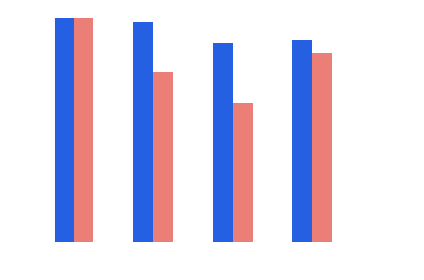

In [8]:
fig, ax1 = plt.subplots()

df_seasons['num_games'].plot.bar(ax=ax1, color = '#2560e3', width=0.25, position= 1)
ax1.set_ylabel('Number of Games', color = 'white')
ax1.tick_params(axis='y', labelcolor='white') 
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

ax2 = ax1.twinx()
df_seasons['est_revenue'].plot.bar(ax=ax2, color='#eb7e76', width=0.25, position= 0)
ax2.set_ylabel('Estimated Average Revenue', color='white')
ax2.tick_params(axis='y', labelcolor='white')
ax2.tick_params(axis='y', colors='white')

ax1.set_xticklabels(df_seasons['season'], rotation=0, color='white')
ax1.set_xlabel('Season', color='white')

ax1.spines["top"].set_color("white")
ax1.spines["right"].set_color("white")
ax1.spines["left"].set_color("white")
ax1.spines["bottom"].set_color("white")
ax2.spines["top"].set_color("white")
ax2.spines["right"].set_color("white")
ax2.spines["left"].set_color("white")
ax2.spines["bottom"].set_color("white")

plt.tight_layout()
# plt.show()
plt.savefig('images/season_all_count.png', dpi=1200, transparent=True)

In [9]:
genre_cols = plot_df.columns[6:-4] 
genre_df = pd.DataFrame()
for i in genre_cols:
    current = plot_df.loc[plot_df[i] == 1]
    df_current = (current.groupby([i],as_index=False)
                 .agg({'name' : 'count', 'owners' : 'mean', 'price' : 'mean', 'est_revenue': 'mean'})
                 .rename(columns={i:'genre', 'name': 'num_games', 'est_revenue': 'avg_est_revenue'})
                 .replace(1, i))
    genre_df = genre_df.append(df_current) 
genre_df = genre_df.reset_index(drop=True)

In [10]:
genre_df.head()

,genre,num_games,owners,price,avg_est_revenue
0,,5,10000.000000,7.130000,7.130000e+04
1,action,7981,170592.031074,7.136799,2.345117e+06
2,adventure,6835,113862.472568,6.920192,1.648396e+06
3,animation&modeling,52,189038.461538,33.291923,1.526004e+06
4,audioproduction,20,12500.000000,9.350000,1.194749e+05


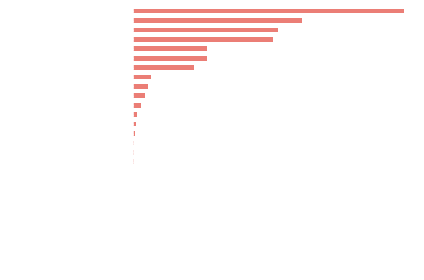

In [11]:
df_genre = genre_df.sort_values(by=['num_games'])
df_genre.plot(kind='barh',x='genre',y='num_games',color='#eb7e76', legend=False)
plt.xlabel('Number of Games', color='white') 
plt.ylabel('Genre', color='white')
# plt.title('Est Revenue for Each Season', color='white')
plt.tight_layout() 
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["left"].set_color("white")
ax.spines["bottom"].set_color("white")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.savefig('images/genres_num_games.png', dpi=1200, transparent=True)
# plt.show

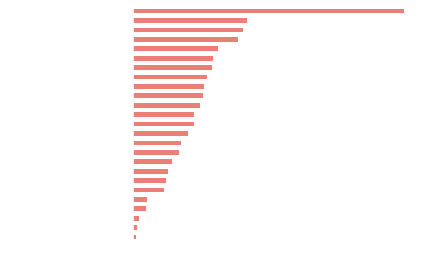

In [12]:
df_genre = genre_df.sort_values(by=['avg_est_revenue'])
df_genre.plot(kind='barh',x='genre',y='avg_est_revenue',color='#eb7e76', legend=False)
plt.xlabel('Est Revenue', color='white') 
plt.ylabel('Genre', color='white')
# plt.title('Est Revenue for Each Season', color='white')
plt.tight_layout() 
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["left"].set_color("white")
ax.spines["bottom"].set_color("white")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.savefig('images/genres_revenue.png', dpi=1200, transparent=True)
# plt.show

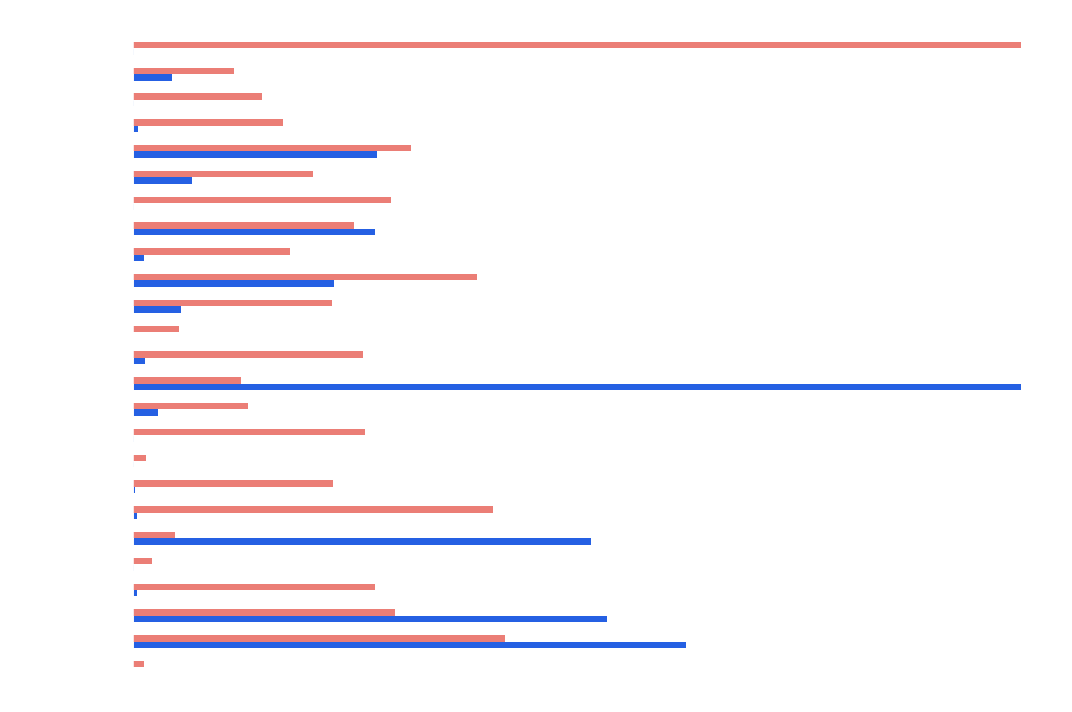

In [13]:
fig, ax1 = plt.subplots(figsize=(15, 10))
genre_df['num_games'].plot.barh(ax=ax1, color = '#2560e3',width=0.25, position= 1)
ax1.set_xlabel('Number of Games', color = 'white')
ax1.tick_params(axis='x', labelcolor='white') 
ax1.tick_params(axis='y', colors='white')
ax1.tick_params(axis='x', colors='white')

ax2 = ax1.twiny()
genre_df['avg_est_revenue'].plot.barh(ax=ax2, color='#eb7e76', width=0.25, position= 0)
ax2.set_xlabel('Estimated Average Revenue', color='white')
ax2.tick_params(axis='x', labelcolor='white')
ax2.tick_params(axis='y', colors='white')
ax2.tick_params(axis='x', colors='white')

ax1.set_yticklabels(genre_df['genre'])
ax1.set_ylabel('Genre', color='white')

ax1.spines["top"].set_color("white")
ax1.spines["right"].set_color("white")
ax1.spines["left"].set_color("white")
ax1.spines["bottom"].set_color("white")
ax2.spines["top"].set_color("white")
ax2.spines["right"].set_color("white")
ax2.spines["left"].set_color("white")
ax2.spines["bottom"].set_color("white")

plt.tight_layout()
# plt.show()
plt.savefig('images/genres_all_count.png', dpi=1200, transparent=True)